## **PORTFOLIO 2** 

### This was an assignment from my course on Data Analysis with Python. Dataset is from IBM Cloud.


In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline 

path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [3]:
# checking the datatypes
print(df.dtypes)

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object


In [7]:
# checking datatype of just one column
df['peak-rpm'].dtypes

# checking the correlation between variables in the datatset
df.corr().head(3)

/var/folders/38/qgw_y07j40z5xz5ft6dtsd800000gn/T/ipykernel_45710/521721525.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().head(3)


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237


In [9]:
# checking correlation between selected column data
df[['bore', 'stroke', 'compression-ratio', 'horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


### In this next code blocks I am using continous numerical variables to explore correlation between different column data:

The graph below shows that price increases as engine size increase. That is, there is postive correlation between engine size nad price
This means that engine size seem to be a good predictor of price.

Here is the correlation bewteen engin size and car price:


,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


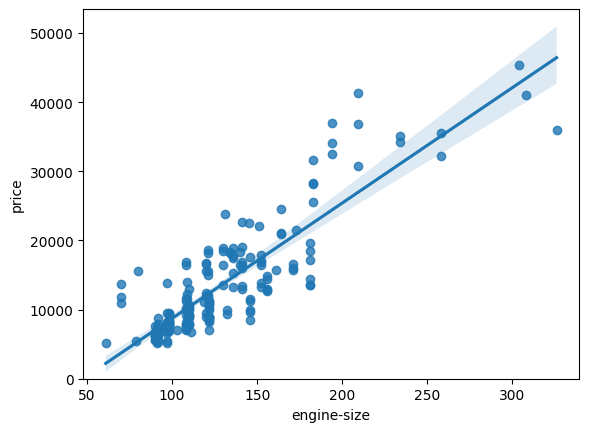

In [19]:
# IN this section, I am exploring the correlation between different column data

# checking if engine size is potential predictor variable of price, using scatter plot
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

print("The graph below shows that price increases as engine size increase. That is, there is postive correlation between engine size and price")
print("This means that engine size seem to be a good predictor of price.")

print("\nHere is the correlation between engine size and car price:")
display(df[["engine-size", "price"]].corr())

The graph below shows that price increases as highway fuel consumption increase.
 That is, there is negative correlation between fuel consumption and price
This means that fuel consumption can be a good predictor of price.

Here is the correlation between fuel consumption and car price:


,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


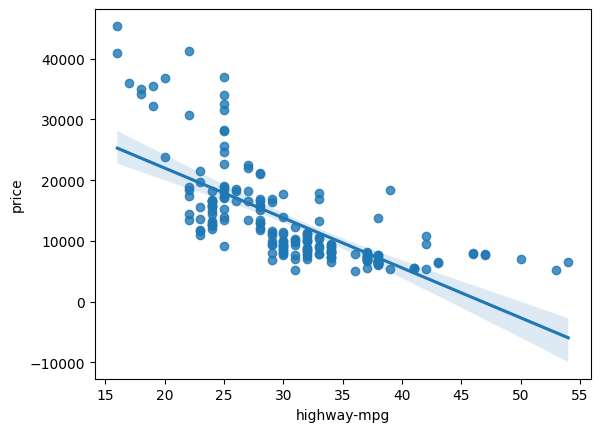

In [21]:
# checking the correlation between highway mpg (miles per galon) and car prices

sns.regplot(x="highway-mpg", y="price", data=df)

print("The graph below shows that price decreases as highway fuel consumption increase.\n That is, there is negative correlation between fuel consumption and price")
print("This means that fuel consumption can be a good predictor of price.")

print("\nHere is the correlation between fuel consumption and car price:")
display(df[["highway-mpg", "price"]].corr())

The graph below shows that price increases as horsepower increase.
 That is, there is positive correlation between horsepower and price
This means that a car's horsepower can be a good predictor of price.

Here is the correlation between fuel consumption and car price:


,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


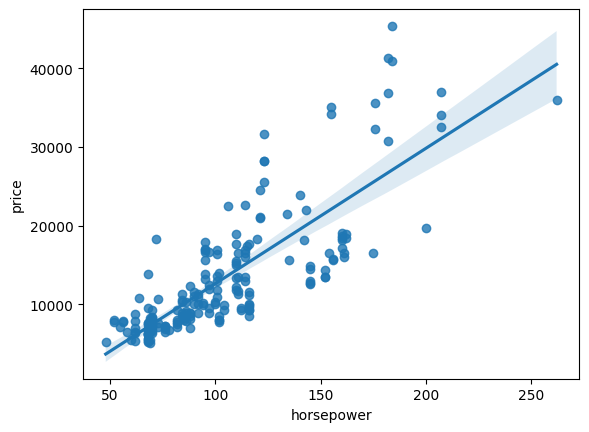

In [23]:
# checking the correlation between car horsepower and car prices
sns.regplot(x="horsepower", y="price", data=df)

print("The graph below shows that price increases as horsepower increase.\n That is, there is positive correlation between horsepower and price")
print("This means that a car's horsepower can be a good predictor of price.")

print("\nHere is the correlation between fuel consumption and car price:")
display(df[["highway-mpg", "price"]].corr())

The graph below shows that horsepower decreases as compression ratio increases.
 That is, there is negative correlation between horsepower and compression ratio.
But compression ratio does not seem to be a good indicator of horsepower. The correlation value is about -0.21

Here is the correlation between horsepower and compression ration:


,compression-ratio,horsepower
compression-ratio,1.000000,-0.214514
horsepower,-0.214514,1.000000


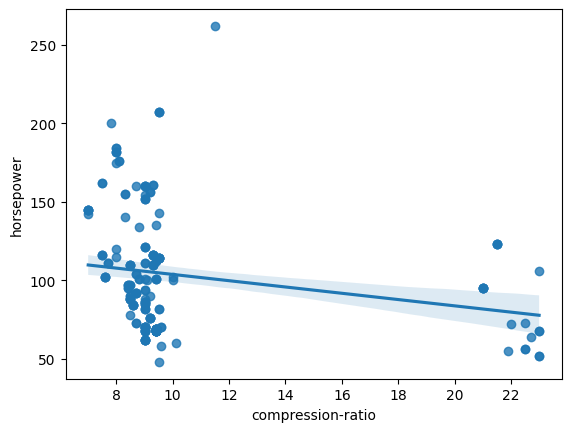

In [29]:
# checking the correlation between car compression ratio and car's horsepower
sns.regplot(x="compression-ratio", y="horsepower", data=df)

print("The graph below shows that horsepower decreases as compression ratio increases.\n That is, there is negative correlation between horsepower and compression ratio.")
print("But compression ratio does not seem to be a good indicator of horsepower. The correlation value is about -0.21")

print("\nHere is the correlation between horsepower and compression ration:")
display(df[["compression-ratio", "horsepower"]].corr())

### In this next code blocks I am using categorical data to explore correlation between different column data:

In the graph below, the distributions of price between the different body-style categories signficantly overlap,
 so body-style would not be a good predictor of price.


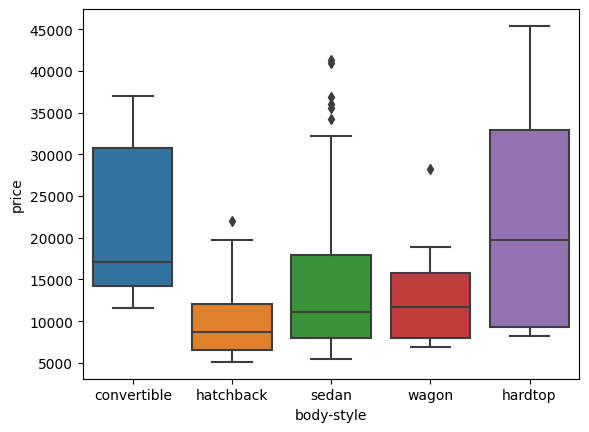

In [33]:
# checking the relationship between "body-style" and "price".
sns.boxplot(x="body-style", y="price", data=df)

print("In the graph below, the distributions of price between the different body-style categories signficantly overlap,\n so body-style would not be a good predictor of price.")

The graph below shows that the distribution between front and rear engine locations are clearly distinct.
 Hence engine location can be a good predictor of price.


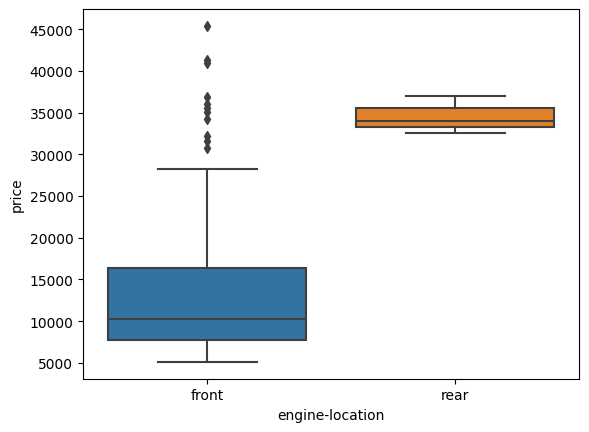

In [37]:
# checking the distribution between two engine location categories
sns.boxplot(x="engine-location", y="price", data=df)

print("The graph below shows that the distribution between front and rear engine locations are clearly distinct.\n Hence engine location can be a good predictor of price.")

### In this next code blocks I perform other exploratory data analysis:

In [40]:
# Here I perform a basic statistics for all continuous variable columns. Any NaN values are automatically skipped in these statistics.
display(df.describe())
("Note that the 25%, 50% and 75% values are the 'IQR (Interqurtile range)' values.)")

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


"Note that the 25%, 50% and 75% values are the 'IQR (Interqurtile range)' values.)"

In [53]:
# checking the different categories of drive wheels in the table and their value counts
df['drive-wheels'].value_counts()

# this can be converted into a dataframe
drivewheel_df = df['drive-wheels'].value_counts().to_frame()
drivewheel_df.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
display(drivewheel_df)



,value_counts
fwd,118
rwd,75
4wd,8


In [55]:
display (df['drive-wheels'].unique())

# grouping results. Note that the price is summed according the drive wheels and body-style grouping
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

array(['rwd', 'fwd', '4wd'], dtype=object)

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [57]:
#Note the difference between this and the previous code block.
df_group_one = df[['drive-wheels','body-style','price']]
df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False).mean()
df_group_one

/var/folders/38/qgw_y07j40z5xz5ft6dtsd800000gn/T/ipykernel_45710/3357049001.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False).mean()


,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [64]:
# calculating Pearson Correlation Coefficient and P-value
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef)
print("P-value of P =", p_value) 
print("\n Linear relationship between horse-power and price is quite strong since Pearson value is close to 1")
print("Correlation between horse-power and price is statistically significant because P-value less than 0.001")


The Pearson Correlation Coefficient is 0.5846418222655085
P-value of P = 8.076488270732338e-20

 Linear relationship between horse-power and price is quite strong since Pearson value is close to 1
Correlation between horse-power and price is statistically significant because P-value less than 0.001
